<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [2]:
import pandas as pd

Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


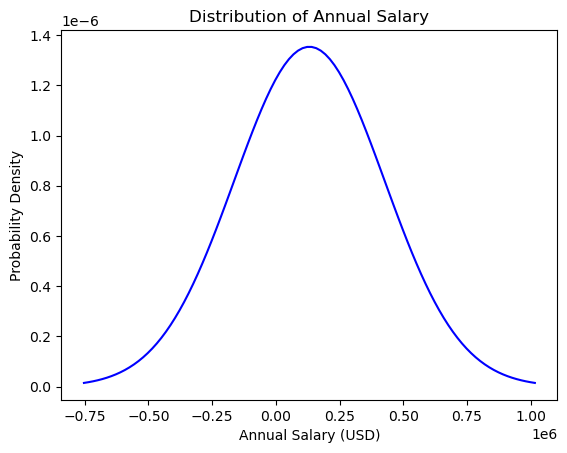

131596.7316197316


In [5]:
# your code goes here
import matplotlib.pyplot as plt
import numpy as np
df = df[df['ConvertedComp'].notna()]

# Calculate the mean and standard deviation of the ConvertedComp column
mean = np.mean(df['ConvertedComp'])
std = np.std(df['ConvertedComp'])

# Plot a curve for the ConvertedComp column
x = np.linspace(mean - 3*std, mean + 3*std, 100)
y = (1/(np.sqrt(2*np.pi)*std))*np.exp(-(x-mean)**2/(2*std**2))
plt.plot(x, y, color='blue')
plt.title('Distribution of Annual Salary')
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Probability Density')
plt.show()

print(mean)

Plot the histogram for the column `ConvertedComp`.


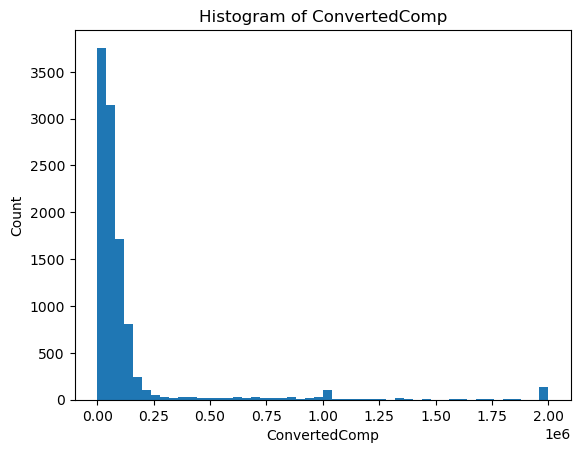

In [5]:
# your code goes here
plt.hist(df['ConvertedComp'], bins=50)
plt.title('Histogram of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.ylabel('Count')
plt.show()

What is the median of the column `ConvertedComp`?


In [10]:
# your code goes here
median = df['ConvertedComp'].median()

print(median)

57745.0


How many responders identified themselves only as a **Man**?


In [17]:
# your code goes here
Man_df = df[df['Gender'] == 'Man'].count()

print(Man_df)

Respondent      9725
MainBranch      9725
Hobbyist        9725
OpenSourcer     9725
OpenSource      9662
                ... 
Sexuality       9332
Ethnicity       9190
Dependents      9611
SurveyLength    9709
SurveyEase      9712
Length: 85, dtype: int64


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [16]:
# your code goes here
woman_df = df[df['Gender'] == 'Woman']


# Calculate the median ConvertedComp for the filtered DataFrame
medianwomen_convertedcomp = woman_df['ConvertedComp'].median()

print(medianwomen_convertedcomp)

57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->



In [19]:
# your code goes here
median_age = df['Age'].median()
print(median_age)
five_num_summary = df['Age'].describe(percentiles=[0.25, 0.5, 0.75])
print(five_num_summary)

29.0
count    10354.000000
mean        30.833040
std          7.389983
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


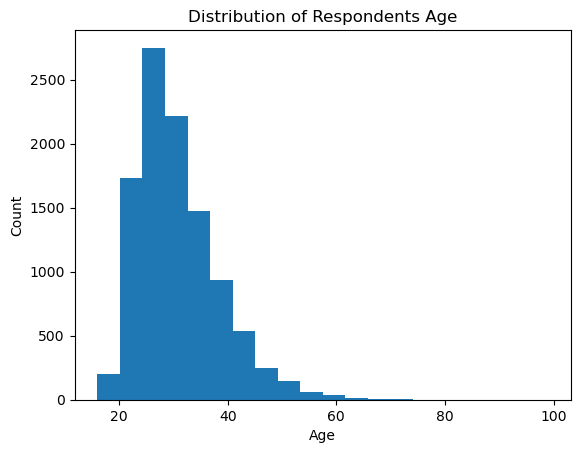

In [20]:
# your code goes here
plt.hist(df['Age'], bins=20)
plt.title('Distribution of Respondents Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:xlabel='ConvertedComp'>

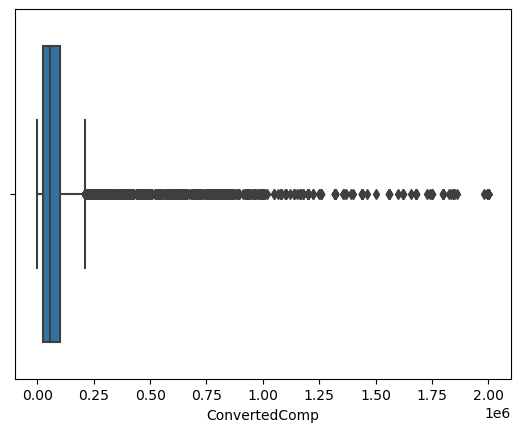

In [11]:
# your code goes here
import seaborn as sns

sns.boxplot(x=df['ConvertedComp'])

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [6]:
# your code goes here
Q1 = np.percentile(df['ConvertedComp'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['ConvertedComp'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print("Interquartile Range (IQR) for ConvertedComp: ", IQR)

Interquartile Range (IQR) for ConvertedComp:  73132.0


Find out the upper and lower bounds.


In [7]:
# your code goes here
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR
print("Upper bound: ", upper_bound)
print("Lower bound: ", lower_bound)

Upper bound:  209698.0
Lower bound:  -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [8]:
# your code goes here
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
num_outliers = outliers.shape[0]
print("Number of outliers: ", num_outliers)

Number of outliers:  879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [16]:
# your code goes here
df = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
print("Number of rows after removing outliers: ", df.shape[0])
mean_value = df['ConvertedComp'].mean()
print("Mean value of ConvertedComp column:", mean_value)

Number of rows after removing outliers:  9703
Mean value of ConvertedComp column: 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [ ]:
# your code goes here


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
